In [31]:
import numpy as np
from keras.utils.np_utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [32]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(72000,)))
#model.add(layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
#model.add(layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               21600300  
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 505       
Total params: 21,630,905
Trainable params: 21,630,905
Non-trainable params: 0
_________________________________________________________________


In [11]:
X = np.load('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/X2_data.npy')
np.random.shuffle(X)
y = X[:,-1]
X=X[:,:-1]


In [12]:
X.shape

(4432, 72000)

In [13]:
kfold = KFold(5, True, 1)

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [ ]:
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
for train_index, test_index in kfold.split(X):
	#print('train: %s, test: %s' % (train_index, test_index))
	X_train= X[train_index]
	y_train=y[train_index]
	X_test=X[test_index]
	y_test=y[test_index]
	X_train=pd.DataFrame(data=X_train)
	y_train=pd.DataFrame(data=y_train)
	y_test=pd.DataFrame(data=y_test)
	X_test=pd.DataFrame(data=X_test)
	one_hot_train_labels = to_categorical(y_train)
	one_hot_test_labels = to_categorical(y_test)
 
	model = models.Sequential()
	model.add(layers.Dense(300, activation='relu', input_shape=(72000,)))
	#model.add(layers.BatchNormalization())
	model.add(Dropout(0.2))
	model.add(layers.Dense(100, activation='relu'))
	#model.add(layers.BatchNormalization())
	model.add(Dropout(0.2))
	model.add(layers.Dense(5, activation='softmax'))
 
	model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
	history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
	loss = history.history['loss']
	val_loss = history.history['val_loss']
	train_loss.append(loss)
	test_loss.append(val_loss)
	train_acc_1=history.history['accuracy']
	val_acc = history.history['val_accuracy']
	test_acc.append(val_acc)
	train_acc.append(train_acc_1)
	a=history.history['auc']
	b=history.history['val_auc']
	test_auc.append(b)
	train_auc.append(a)

Epoch 1/500
43/43 [==============================] - 16s 338ms/step - loss: 57.9201 - accuracy: 0.2411 - auc: 0.5350 - val_loss: 8.3883 - val_accuracy: 0.3210 - val_auc: 0.6251
Epoch 2/500
43/43 [==============================] - 15s 351ms/step - loss: 9.1489 - accuracy: 0.3577 - auc: 0.6212 - val_loss: 9.1691 - val_accuracy: 0.4009 - val_auc: 0.6350
Epoch 3/500
43/43 [==============================] - 15s 348ms/step - loss: 5.0012 - accuracy: 0.4078 - auc: 0.6747 - val_loss: 1.6745 - val_accuracy: 0.5991 - val_auc: 0.8259
Epoch 4/500
43/43 [==============================] - 15s 354ms/step - loss: 1.9402 - accuracy: 0.4798 - auc: 0.7686 - val_loss: 1.5856 - val_accuracy: 0.5015 - val_auc: 0.8079
Epoch 5/500
43/43 [==============================] - 14s 328ms/step - loss: 1.0688 - accuracy: 0.5822 - auc: 0.8690 - val_loss: 3.3079 - val_accuracy: 0.3772 - val_auc: 0.6603
Epoch 6/500
43/43 [==============================] - 15s 350ms/step - loss: 1.4263 - accuracy: 0.5522 - auc: 0.8273 - v

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/copd_9797.h5')
np.save('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/train_loss',train_loss)
np.save('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/test_loss',test_loss)
np.save('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/train_acc',train_acc)
np.save('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/test_acc',test_acc)
np.save('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/train_auc',train_auc)
np.save('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/test_auc',test_auc)

In [34]:
train_loss=np.load('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/train_loss.npy')
test_loss=np.load('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/test_loss.npy')
train_acc=np.load('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/train_acc.npy')
test_acc=np.load('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/test_acc.npy')
train_auc=np.load('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/train_auc.npy')
test_auc=np.load('/content/drive/My Drive/Colab Notebooks/ML/New_version_copd/test_auc.npy')

In [35]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [39]:

train_acc_min=[]
train_acc_max=[]
train_acc_mean=[]
for i in range(0, 500):
    maxv=max(train_acc[0][i],train_acc[1][i],train_acc[2][i],train_acc[3][i],train_acc[4][i])
    minv=min(train_acc[0][i],train_acc[1][i],train_acc[2][i],train_acc[3][i],train_acc[4][i])
    meanv=(train_acc[0][i]+train_acc[1][i]+train_acc[2][i]+train_acc[3][i]+train_acc[4][i]) /5
    train_acc_min.append(minv)
    train_acc_max.append(maxv)
    train_acc_mean.append(meanv)

In [40]:
test_acc_min=[]
test_acc_max=[]
test_acc_mean=[]
for i in range(0, 500):
    maxv=max(test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i],test_acc[4][i])
    minv=min(test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i],test_acc[4][i])
    meanv=(test_acc[0][i]+test_acc[1][i]+test_acc[2][i]+test_acc[3][i]+test_acc[4][i]) /5
    test_acc_min.append(minv)
    test_acc_max.append(maxv)
    test_acc_mean.append(meanv)

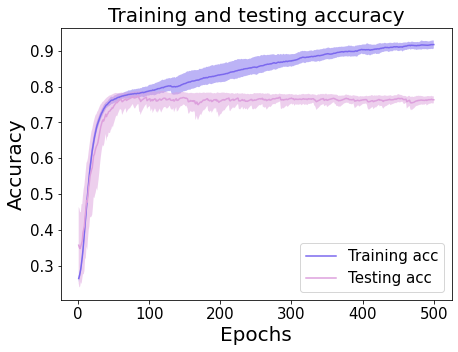

In [42]:
f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_acc_mean), 'k', color='mediumslateblue',label='Training acc')
plt.fill_between(epochs, smooth_curve(train_acc_min), smooth_curve(train_acc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_acc_mean), 'k', color='plum',label='Testing acc')
plt.fill_between(epochs, smooth_curve(test_acc_min), smooth_curve(test_acc_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingacc7-5.png', dpi=600)
plt.show()


In [45]:
train_auc_min=[]
train_auc_max=[]
train_auc_mean=[]
for i in range(0, 500):
    maxv=max(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i],train_auc[4][i])
    minv=min(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i],train_auc[4][i])
    meanv=(train_auc[0][i]+train_auc[1][i]+train_auc[2][i]+train_auc[3][i]+train_auc[4][i]) /5
    train_auc_min.append(minv)
    train_auc_max.append(maxv)
    train_auc_mean.append(meanv)

In [46]:
test_auc_min=[]
test_auc_max=[]
test_auc_mean=[]
for i in range(0, 500):
    maxv=max(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i],test_auc[4][i])
    minv=min(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i],test_auc[4][i])
    meanv=(test_auc[0][i]+test_auc[1][i]+test_auc[2][i]+test_auc[3][i]+test_auc[4][i]) /5
    test_auc_min.append(minv)
    test_auc_max.append(maxv)
    test_auc_mean.append(meanv)

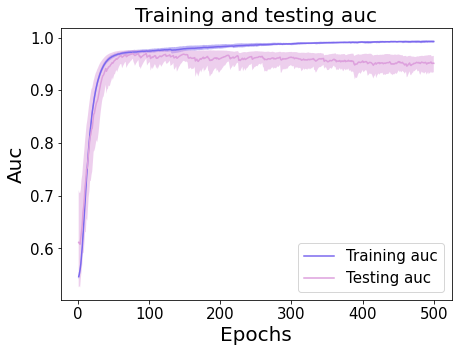

In [48]:
f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_auc_mean), 'k', color='mediumslateblue',label='Training auc')
plt.fill_between(epochs, smooth_curve(train_auc_min), smooth_curve(train_auc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_auc_mean), 'k', color='plum',label='Testing auc')
plt.fill_between(epochs, smooth_curve(test_auc_min), smooth_curve(test_auc_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing auc',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Auc',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingauc.png', dpi=600)
plt.show()